In [2]:
from pendulum import simple_spherical_pendulum
import pandas as pd
import numpy as np
import math

# parameters for spherical pendulum
azimuthal_angle = [0]
polar_angle = [math.pi/100]
length, gravity, mass = 1, 10, 1
time_step, time_max = 0.01, 100

# collect data
data = simple_spherical_pendulum(azimuthal_angle, polar_angle, length, gravity, mass, time_step, time_max)

time = [0]
while (time[-1] < time_max):
    time.append(time[-1] + time_step)

train = data[:8000]
test = data[8000:]



# Fitting models and making predictions

In [3]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [6]:
'''
Using autoregression, moving average, autoregressive moving average, autoregressive integrated moving average, seasonal
autoregressive integrated moving average
'''

models = [
            AutoReg(train, lags=1), 
            ARIMA(train, order=(0, 0, 1)), 
            ARIMA(train, order=(2,0,1)), 
            ARIMA(train, order=(1,1,1)),
            SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,0))
        ]
root_mean_squared_errors = []

for model in models:
    model_fit = model.fit()
    preds = model_fit.predict(start=len(train), end=len(train) + len(test)-1)
    root_mean_squared_errors.append(math.sqrt(mean_squared_error(preds, test)))

print (root_mean_squared_errors)

/home/eric/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


[0.7290528376974249, 0.729081520328361, 0.7290195227408162, 0.7291092347712497, 0.7291092347712497]
2001


The RMS errors are quite large. I will plot the predictions and the data to see what they look like.

Text(0, 0.5, 'data')

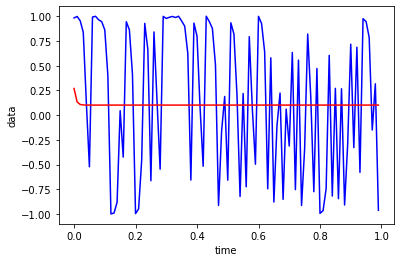

In [8]:
import matplotlib.pyplot as plt

time_slice = time[:100]
test_slice = test[:100]
preds_slice = preds[:100]

plt.plot(time_slice, test_slice, 'b')
plt.plot(time_slice, preds_slice, 'r')
plt.xlabel('time')
plt.ylabel('data')

The predicted values are not oscillating at all.